Given the head of a singly linked list, return true if it is a palindrome(A palindrome is a sequence that reads the same forward and backward.) or false otherwise.

 

Example 1:

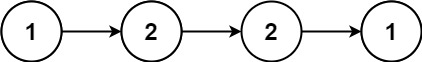

* Input: head = [1,2,2,1]
* Output: true


Example 2:

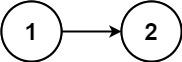

* Input: head = [1,2]
* Output: false
 

Constraints:

The number of nodes in the list is in the range [1, 105].
0 <= Node.val <= 9
 

Follow up: Could you do it in O(n) time and O(1) space?

In [ ]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [ ]:

class Solution(object):
    def isPalindrome(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """
        # Option 1
        """
        step 1: reverse the linked list
                recursive method
        step 2: iterate two lists from heads and compre values
        """

        # step 1: inplace reversal
        def reverse(root):
            if( root.next is None ):
                return root

            head_node = reverse(root.next)
            temp = root.next
            root.next = None
            temp.next = root

            return head_node
        
        # step 2: create seperate linked list ( since we do inplace reversal )
        head_ref= head
        head_temp = ListNode(0)
        temp_ref = head_temp

        while head_ref :
            temp_node = ListNode(head_ref.val)
            temp_ref.next = temp_node
            head_ref = head_ref.next
            temp_ref = temp_node

        forward_head = head_temp.next
        reverse_head = reverse(head)

        
        # step 3: iteratively check each value
        while ( forward_head and reverse_head ):
            if( forward_head.val != reverse_head.val ): return False
            else:
                forward_head = forward_head.next
                reverse_head= reverse_head.next

        return True

In [ ]:
class Solution(object):
    def isPalindrome(self, head):
        """
        :type head: ListNode
        :rtype: bool
        """

        # Option 2

        # """
        # step 1: find the middle of the linkedlist
        # step 2: reverse the linked list from the middle point
        # step 3: traverse through the head and middle point and check each value
        # """

        # step 1: 
        hop_1 , hop_2 = head , head
        while (hop_2 is not None) and (hop_2.next is not None):
            hop_2 =  hop_2.next.next
            hop_1 = hop_1.next

        # check hop_2 position in odd location if so increment hop_1
        if ( hop_2 is not None ) and (hop_2.next is None):
            hop_1 = hop_1.next

        # step 2:
        """
        2 --> 1 --> 3 --> 4
        """
        prev_node = None
        while (hop_1 is not None) and (hop_1.next is not None):
            temp = hop_1.next
            hop_1.next = prev_node
            prev_node = hop_1
            hop_1 = temp

        if(hop_1 is not None):
            hop_1.next = prev_node

        # step 3:
        hop_2 = head
        while( (hop_1 is not None) and (hop_2 is not None) ):
            if( hop_1.val != hop_2.val ): return False

            else: 
                hop_1 = hop_1.next
                hop_2 = hop_2.next

        return True

